In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rand_state = 1000

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/my ml/Obesity Dataset.csv")
df.drop('ID',axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175.0,80,25.3,Normal Weight
1,30,Female,160.0,60,22.5,Normal Weight
2,35,Male,180.0,90,27.3,Overweight
3,40,Female,150.0,50,20.0,Underweight
4,45,Male,190.0,100,31.2,Obese


**Data preprocessing**

In [ ]:
 df.isna().sum()

Age       0
Gender    1
Height    1
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
df.isnull().sum() / len(df)

Age       0.000000
Gender    0.009259
Height    0.009259
Weight    0.000000
BMI       0.000000
Label     0.000000
dtype: float64

**Plotting the NA values**

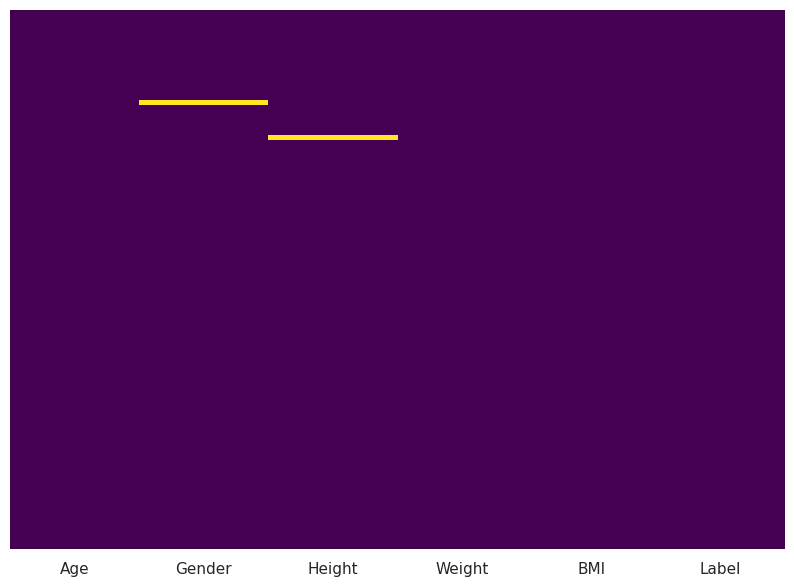

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
# we will replace the missing Height with median and Gender with most frequent value.
df['Height'].fillna(df['Height'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    float64
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 5.2+ KB


In [ ]:
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
 df.isna().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
data=df[df['Label']=='obese']
data

,Age,Gender,Height,Weight,BMI,Label
24,88,Male,190.0,100,31.2,obese


In [ ]:
bmi=df['BMI'].value_counts()
bmi

BMI
16.7     11
13.3      8
21.2      8
22.7      7
20.0      6
10.0      6
26.1      5
18.7      5
24.2      5
5.6       4
8.3       4
22.5      4
27.0      4
25.0      4
28.9      3
27.5      3
25.3      3
34.2      3
31.2      3
27.3      3
23.4      2
37.2      2
3.9       2
30.8      1
29.1      1
100.0     1
Name: count, dtype: int64

**let's figure out what should be the type of each feature?**

*   Starting by counting the unique elements for each variable:




In [ ]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [ ]:
df['Gender'].nunique()

2

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

Age 76
Gender 2
Height 10
Weight 23
BMI 26
Label 10




*   We can also tabularize the variables of interest using value_counts() function from pandas.




In [ ]:
for col in ['Gender', 'Label', 'Age']:
    print(df[col].value_counts())

Gender
Male      56
Female    52
Name: count, dtype: int64
Label
Underweight      43
Normal Weight    28
Overweight       19
Obese            11
Under weight      2
underweight       1
Normal            1
obese             1
Over weight       1
Underwight        1
Name: count, dtype: int64
Age
25    2
58    2
24    2
29    2
30    2
     ..
60    1
68    1
67    1
72    1
11    1
Name: count, Length: 76, dtype: int64


In [ ]:
df.replace('obese','Obese', inplace=True)

In [ ]:
df.replace('Under weight','Underweight', inplace=True)

In [ ]:
df.replace('underweight','Underweight', inplace=True)

In [ ]:
df.replace('Normal','Normal Weight', inplace=True)

In [ ]:
df.replace('Over weight','Overweight', inplace=True)

In [ ]:
df.replace('Underwight','Underweight', inplace=True)

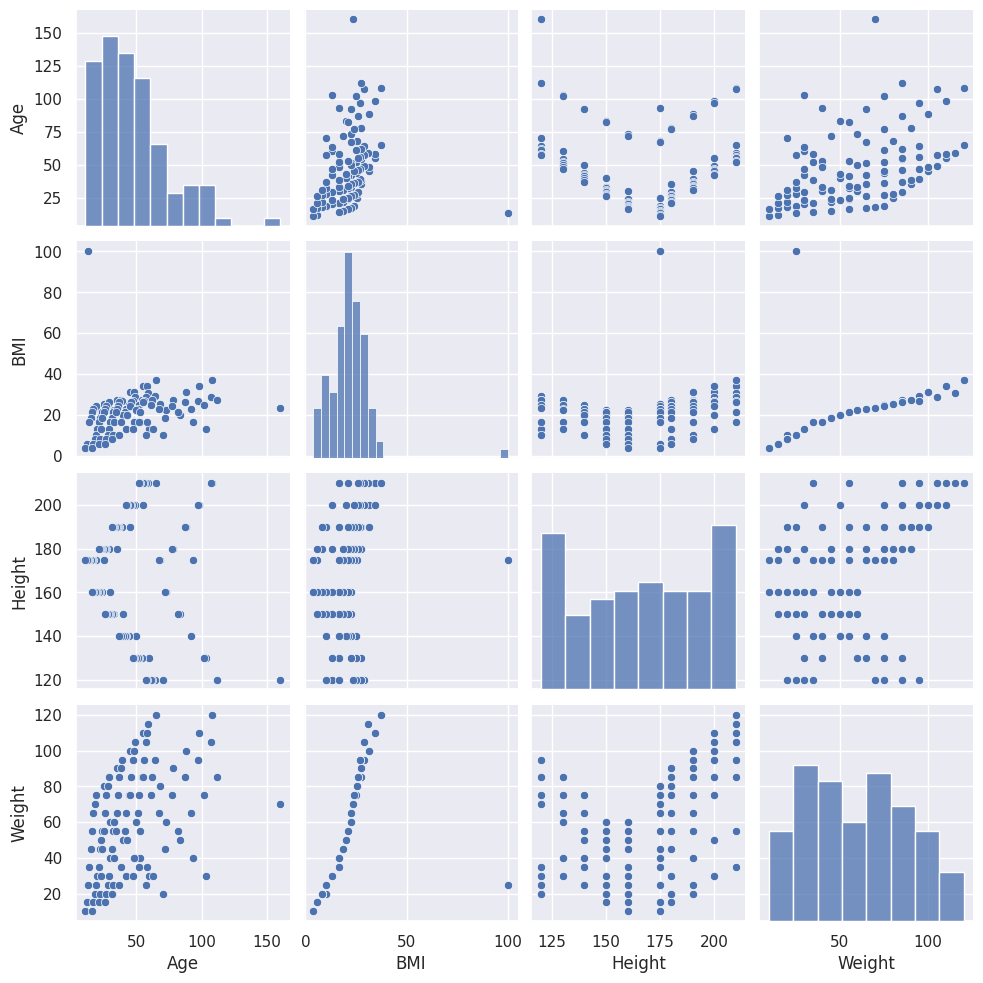

In [ ]:
sns.pairplot(df[['Label', 'Age','BMI','Gender','Height','Weight']])
plt.show()

In [ ]:
sns.heatmap(df_cat.corr(),cmap='RdBu',annot=True)

ValueError: could not convert string to float: 'Normal Weight'

<Axes: xlabel='Label', ylabel='count'>

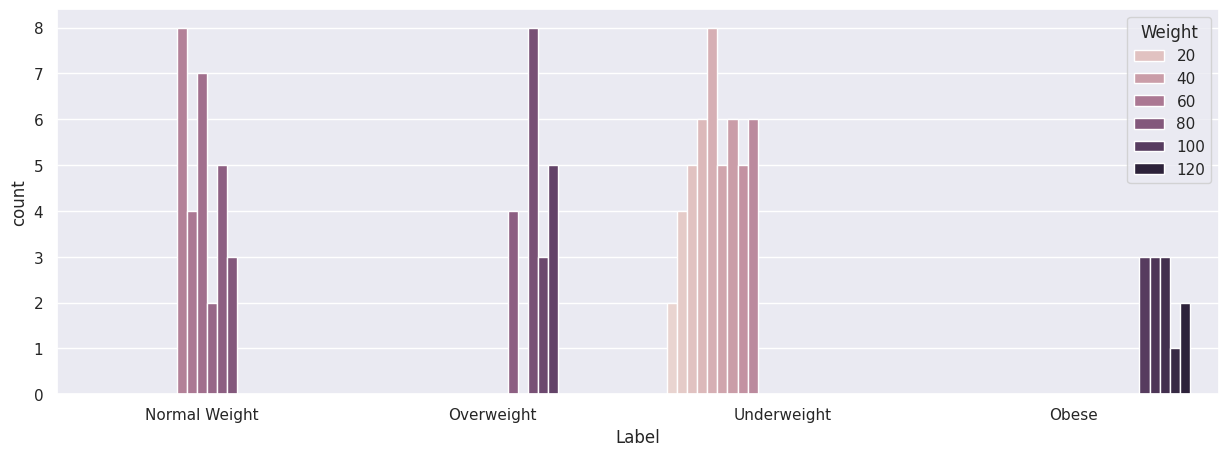

In [ ]:
#sns.countplot(df.Label)
sns.countplot(x='Label',hue='Weight',data=df)

NB: The dataset is imbalanced



*   apparantly Gender and Label should be categorical variables and the rest of them be numerics.




In [ ]:
df_cat = df.copy()

In [ ]:
categorical = ['Gender', 'Label' ]

for col in categorical:
    df_cat[col] = df_cat[col].astype("category")

In [ ]:
df_cat.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175.0,80,25.3,Normal Weight
1,30,Female,160.0,60,22.5,Normal Weight
2,35,Male,180.0,90,27.3,Overweight
3,40,Female,150.0,50,20.0,Underweight
4,45,Male,190.0,100,31.2,Obese


In [ ]:
for col in ['Gender', 'Label', 'Age']:
    print(df_cat[col].value_counts())

Gender
Male      56
Female    52
Name: count, dtype: int64
Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64
Age
25    2
58    2
24    2
29    2
30    2
     ..
60    1
68    1
67    1
72    1
11    1
Name: count, Length: 76, dtype: int64


 **Separating Features and Target**

Target is in column Label. So X will have all values apart from column class and y will have column Label

In [ ]:
X = df_cat.drop(['Label'],axis=1)
y = df_cat['Label']

As all the values in the dataset are categorical. X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [ ]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Age,Height,Weight,BMI,Gender_Male
0,25,175.0,80,25.3,True
1,30,160.0,60,22.5,False
2,35,180.0,90,27.3,True
3,40,150.0,50,20.0,False
4,45,190.0,100,31.2,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

{0: 'Normal Weight', 1: 'Obese', 2: 'Overweight', 3: 'Underweight'}


 **Splitting Dataset to training and test data**


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.75,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
clf=DecisionTreeClassifier()
xgb = XGBClassifier()
svm = SVC(kernel='linear')
rt = RandomForestClassifier()

In [ ]:
xtrain.shape , xtest.shape

((81, 5), (27, 5))

In [ ]:
ytrain.shape , ytest.shape

((81,), (27,))

In [ ]:
df_cat.nunique()

Age       76
Gender     2
Height    10
Weight    23
BMI       26
Label      4
dtype: int64

In [ ]:
def model(xtrain,ytrain,xtest,ytest):
    model_name=['DecisionTreeClassifier','XGBClassifier','SVM','RandomForestClassifier']
    accuracy=[]
    train_accuracy=[]


    #DecisionTreeClassifier
    clf.fit(xtrain,ytrain)
    accuracy.append(clf.score(xtest,ytest))
    train_accuracy.append(clf.score(xtrain,ytrain))


    #XGBClassifier
    xgb.fit(xtrain,ytrain)
    accuracy.append(clf.score(xtest,ytest))
    train_accuracy.append(xgb.score(xtrain,ytrain))

    #SVM
    svm.fit(xtrain, ytrain)
    accuracy.append(svm.score(xtest,ytest))
    train_accuracy.append(svm.score(xtrain,ytrain))

    #RandomForestClassifier
    rt.fit(xtrain, ytrain)
    accuracy.append(rt.score(xtest,ytest))
    train_accuracy.append(rt.score(xtrain,ytrain))


    return model_name,accuracy,train_accuracy

In [ ]:
model_name,test,train=model(xtrain,ytrain,xtest,ytest)

In [ ]:
def dataframe(y):
    vis={'Algorithm':['DecisionTreeClassifier','XGBClassifier','SVM','RandomForestClassifier'],
     'Accuracy':y

    }
    accuracy=pd.DataFrame(vis)
    return accuracy

In [ ]:
data=dataframe(test)

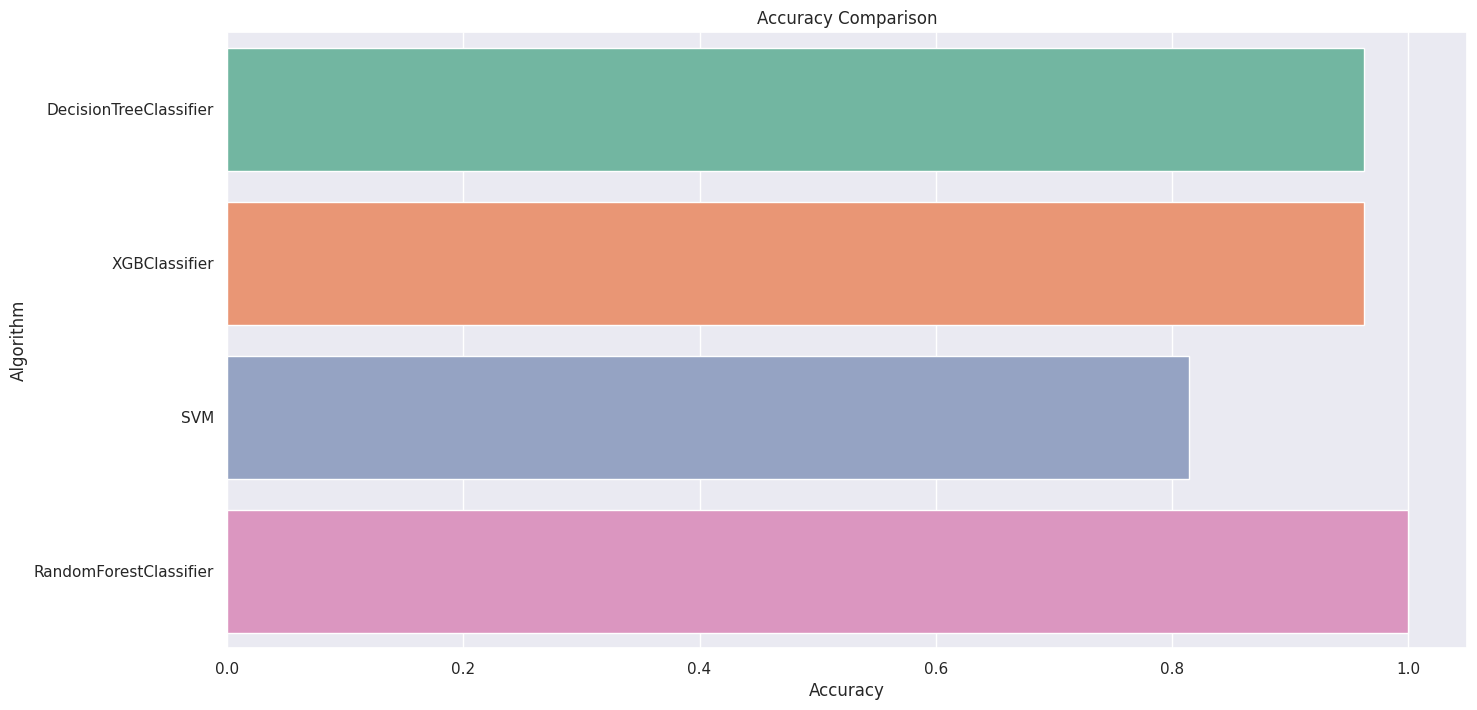

In [ ]:
plt.figure(figsize=(16,8))
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="Algorithm",x='Accuracy',data=data,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

In [ ]:
data2=dataframe(train)

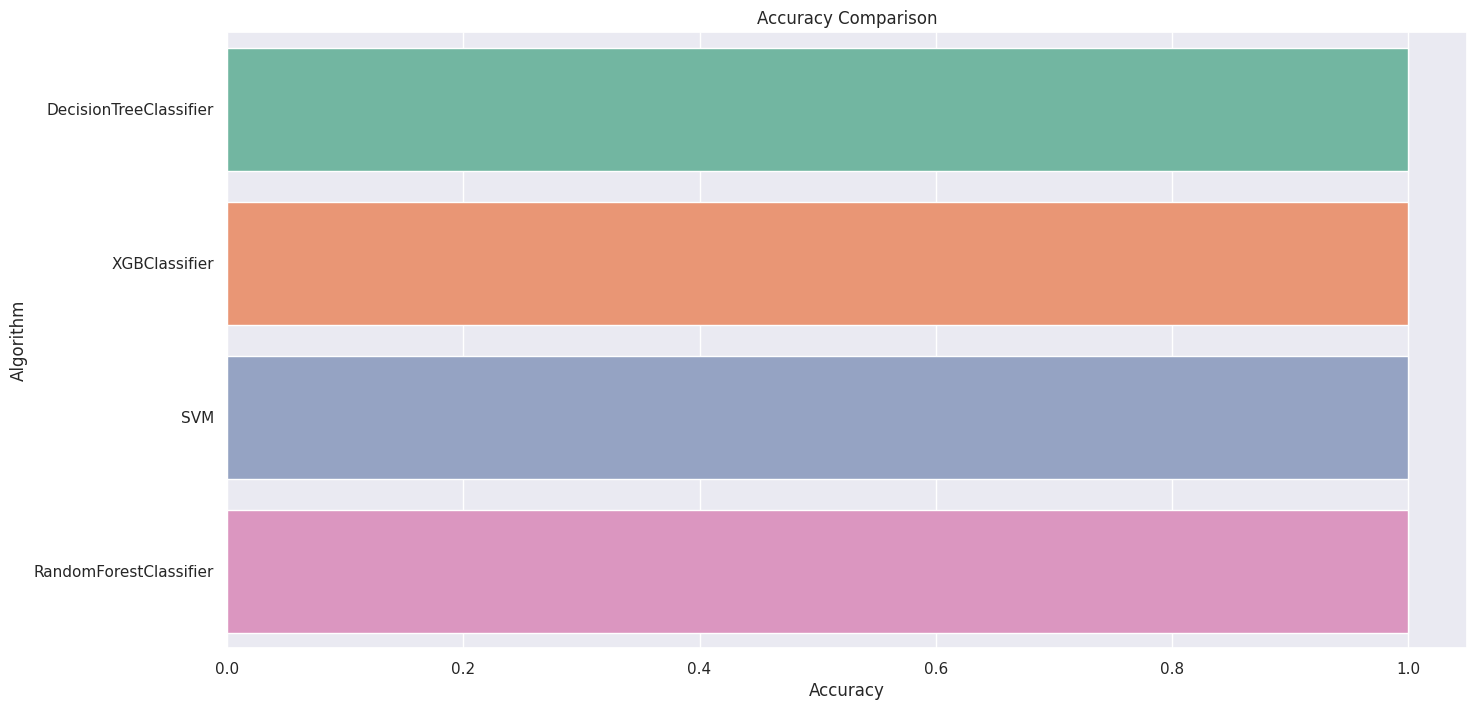

In [ ]:
plt.figure(figsize=(16,8))
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="Algorithm",x='Accuracy',data=data2,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

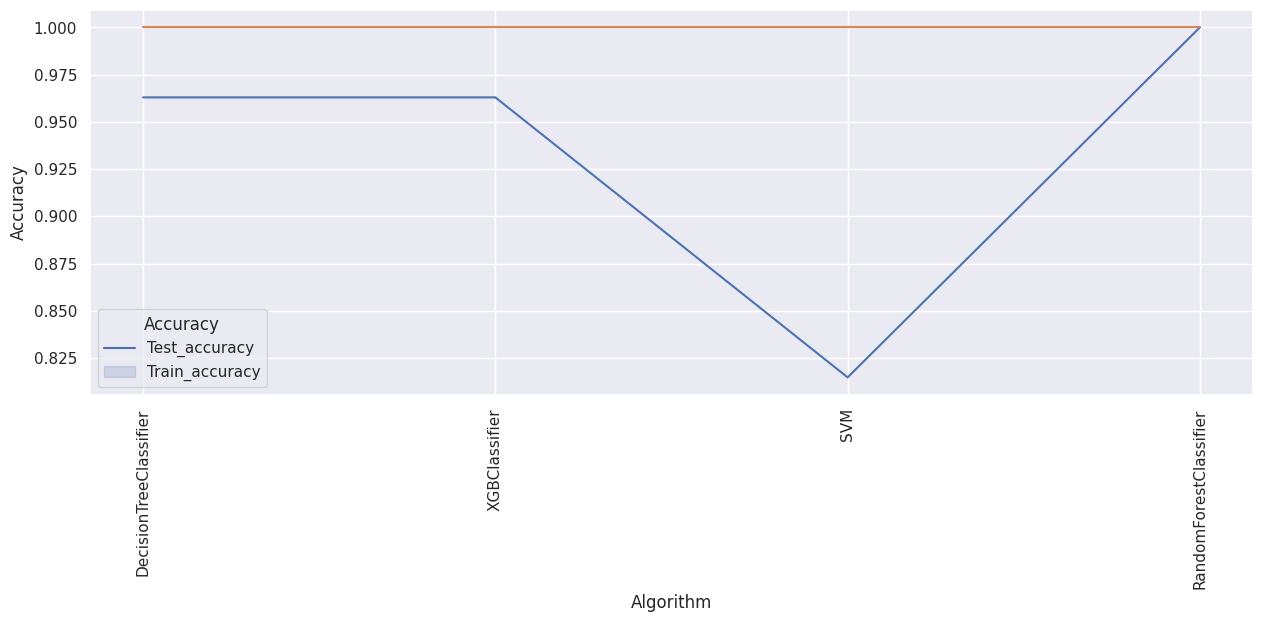

In [ ]:
sns.lineplot(data=data, x="Algorithm", y="Accuracy")
sns.lineplot(data=data2, x="Algorithm", y="Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation='vertical')
plt.legend(labels=["Test_accuracy","Train_accuracy"], title = "Accuracy")
plt.show()

In [ ]:
#'RandomForestClassifier'----------------------------------------->best fit

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve

In [ ]:
pred_dclf=clf.predict(xtest)
pred_xgb=xgb.predict(xtest)
pred_svm=svm.predict(xtest)
pred_rfc=rt.predict(xtest)

In [ ]:

print("Report of XGboost Classification:\n\n",classification_report(ytest, pred_xgb))
print("Report of Support Vector Machine Classification:\n\n",classification_report(ytest, pred_svm))
print("Report of Random Forest Classification:\n\n",classification_report(ytest, pred_rfc))
print("Report of Decision Tree:\n\n",classification_report(ytest, pred_dclf))

Report of XGboost Classification:

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         5
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00         8

    accuracy                           0.93        27
   macro avg       0.95      0.92      0.92        27
weighted avg       0.94      0.93      0.92        27

Report of Support Vector Machine Classification:

               precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      1.00      1.00         5
           2       0.80      0.50      0.62         8
           3       1.00      1.00      1.00         8

    accuracy                           0.81        27
   macro avg       0.84      0.83      0.82        27
weighted avg       0.84      0.81      0.81        27

Report of Random Forest Classification:

  

In [ ]:
cm_dclf=confusion_matrix(ytest,pred_dclf)
cm_xgb=confusion_matrix(ytest,pred_xgb)
cm_svm=confusion_matrix(ytest,pred_svm)
cm_rfc=confusion_matrix(ytest,pred_rfc)

In [ ]:
label_con=['True','False']

In [ ]:
conf_mat=[cm_dclf,cm_xgb,cm_svm,cm_rfc]

In [ ]:
len(conf_mat)

4

In [ ]:
algo=['Decision Tree Classification','XGboost Classification','Support Vector Machine Classification','Random Forest Classification']

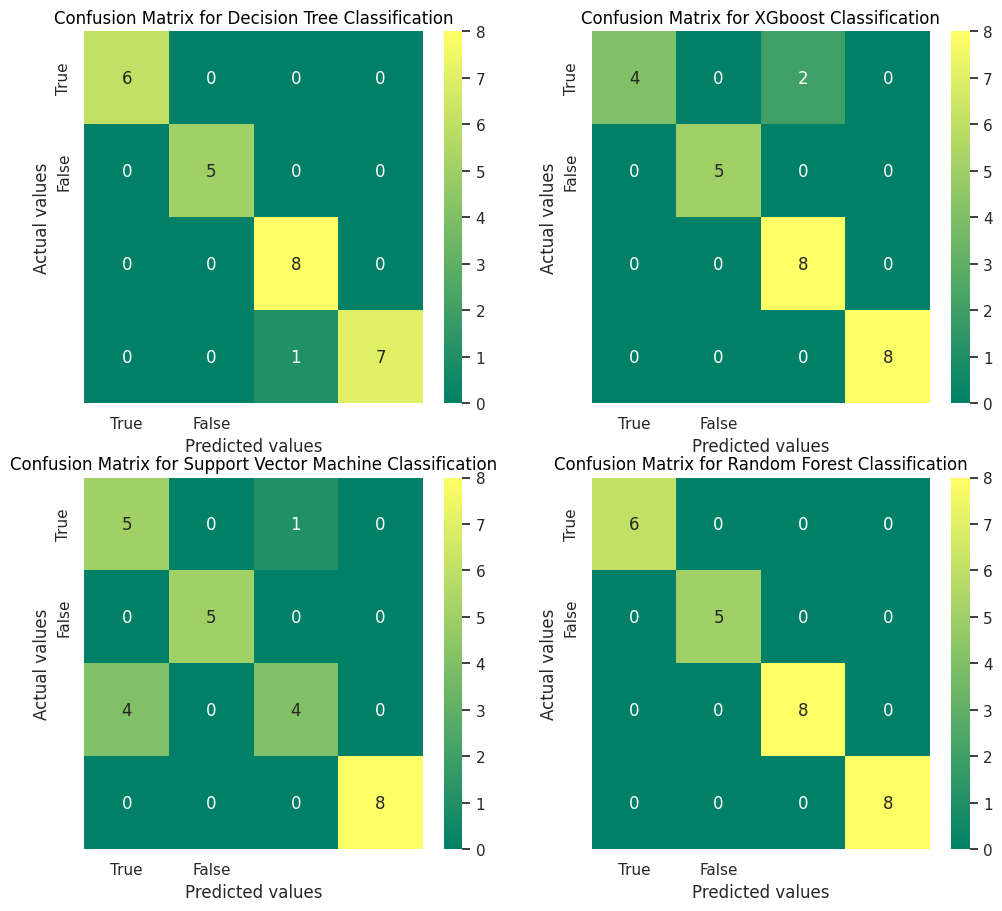

In [ ]:
plt.figure(figsize=(12,28))
for i in range(1,5):

    plt.subplot(5,2,i)
    sns.heatmap(conf_mat[i-1],cmap='summer',annot=True,fmt='d',xticklabels=label_con,yticklabels=label_con)
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title(f'Confusion Matrix for {algo[i-1]}',color='black')